# Reconnaissance vocale avec un Transformer

**Author:** Samane HABIBI - SIA 2021-2022

**Crédits du code du Speech Transformer** : [Apoorv Nandan - Speech Transformer example from Keras](https://keras.io/examples/audio/transformer_asr/)<br> 

**Crédits du code du module d'enregistrement vocal** : [Ricardo de Azambuja - Direct access to your webcam and microphone inside Google Colab notebook]( https://ricardodeazambuja.com/deep_learning/2019/03/09/audio_and_video_google_colab/)<br>


## Introduction

**Bienvenue cher utilisateur !** 

Ce petit tutoriel est la finalisation de mon projet de 3ème année à l'ENSEA et est à destination de toute personne qui s'intéresse, comme moi, à la reconnaissance vocale (transcription de la parole en texte) (et aussi à mon jury de projet, héhé). L'objectif de ce tutoriel est de construire un module de reconnaissance vocale. Pour cela, nous allons nous introduire au Deep Learning (branche de l'Intelligence Artificielle), et construire ensemble un modèle de réseau de neurones qui fera la reconnaissance vocale + un module d'enregistrement de votre voix sur quelques secondes. Nous obtiendrons enfin une prédiction du réseau de neurones qui nous donnera une transcription de vos paroles en texte. Le code de ce projet est écrit intégralement en Python, et la conception du réseau de neurones ainsi que son entrainement ont été faits avec la bibliothèque **Tensorflow**, sur GPU via Google Colab.

Nous allons utiliser un des réseaux de neurones les plus avancés à l'heure actuelle en Deep Learning : le Transformer. Ce modèle sera appliqué à des données audio de parole pour construire le modèle **Speech-Transformer** présenté dans le papier [Speech-Transformer: A No-Recurrence Sequence-to-Sequence Model for Speech Recognition (2018)](https://ieeexplore.ieee.org/document/8462506). C'est un des premiers Transformers appliqués à la reconnaissance vocale. La compréhension d'un Transformer n'est pas innée, donc nous allons y aller petit à petit, en commençant par comprendre ce qu'est un réseau de neurones.

Sommaire :    

* Qu'est-ce qu'un réseau de neurones ?
* C'est quoi un Speech-Transformer ?
* Implémentation et entrainement d'un Speech-Transformer
* Implémentation du module d'enregistrement audio
* Test du modèle sur la voix enregistrée


# 1. C'est quoi un réseau de neurones ?

**WARNING : ce qui suit va être long, donc si vous connaissez déjà les bases du Deep Learning et des réseaux de neurones, ne vous embêtez pas avec cette première partie, et allez directement à la section 2 sur le Transformer.**




Well, avant toute chose, il convient de rappeler un peu d'où vient cette idée de "réseau de neurones".

Tout part de **l'Intelligence Artificielle** : l'Intelligence Artificielle est un domaine de recherche en mathématiques et informatique qui vise à reproduire et simuler des capacités cognitives de l'être humain, en particulier la capacité à résoudre des problèmes complexes. Il s'agit en d'autres termes de donner à une machine la capacité de reproduire "l'intelligence humaine". Objet de fictions et de fanstasmes, elle est un des domaines de recherche les plus actifs à l'heure actuelle, et comporte les sous-ensembles que sont **l'apprentissage automatique (Machine Learning)** et **l'apprentissage profond (Deep Learning)** dont on entend souvent parler.

Le **Machine Learning (ML)** est une branche de l'IA fondée sur des algorithmes qui, alimentés de données, tendent à apprendre et à s’améliorer automatiquement. Les processus d’apprentissage et d’amélioration continue des modèles de ML se font à partir de l’expérience (analyse de données empiriques), de manière automatique. On s'en sert pour réaliser différentes tâches comme classifier des images, prédire le prix d'un appartement selon des caractéristiques (features) données, reconnaître des caractères manuscrits etc... Ces algorithmes nécessitent en général des milliers de données et doivent être préparés avec précaution, ce que l'on fait avec des outils de Data Science (domaine de recherche qui regroupe les méthodologies et outils inhérents à la collecte, la gestion et l’analyse de données). L'explosion des données et la récente démultiplication de puissance de calcul des ordinateurs a conduit dans les années 2010 à l'essor d'une sous-branche du ML qui est le Deep Learning.


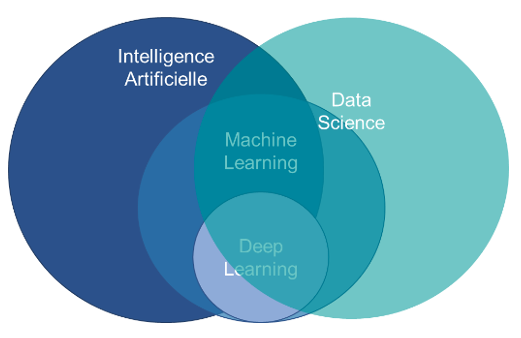

**Source**  : *https://datavalue-consulting.com/data-science-intelligence-artificielle-machine-learning-deep-learning-definitions-differences/*


Le **Deep Learning (DL)** est une branche de l'intelligence artificielle qui vise à résoudre le problème de la représentation de données complexes par l'analyse de millions de points de données. C'est là qu'interviennent les **réseaux de neurones** : ce sont les principaux outils des algorithmes de Deep Learning ! Les réseaux de neurones sont des empilements de "couches" de traitement qui visent à fournir un modèle pour interpréter les caractéristiques et les relations des données. Grâce aux réseaux de neurones, les algorithmes de DL sont capables de représenter des données aux caractéristiques complexes en les exprimant en termes de représentations plus simples : chaque concept est défini par rapport à des concepts plus simples représentés par les couches d'un réseau. Plus un réseau possède de couches (plus il est profond), plus il peut extraire des caractéristiques abstraites. En ce sens, un réseau de neurones est une **série de mises en correspondance simples imbriquées**, représentées par ses couches.

Bon, on ne sait toujours pas à quoi ça ressemble un réseau de neurones ! Et bien une des architectures les plus simples de réseau de neurones ressemble à ça : 


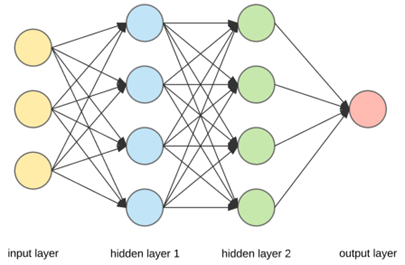

**Source** : *C. Pelletier, G. I. Web, F. Petitjean. Temporal Convolutional Neural Network For The Classification Of Satellite Image Time Series. In Remote Sensing 2019, Volume 11, n°5, pp 523*


Je sais je sais, ça n'a pas l'air très lisible comme ça. En fait en pratique un réseau de neurones est composé, comme son nom l'indique, de **neurones** : les neurones sont des unités connectées qui traitent une entrée $x=(x_1, x_2, ... x_n)$ ( features ) pour produire une seule sortie scalaire $y$. Cette sortie est la somme de ces features $(x_1, x_2, ... x_n)$, pondérée par les poids $w_i∈(w_1,...,w_n)$, plus un biais $b$. La somme passe ensuite par une fonction non linéaire $f$ appelée **fonction d'activation**. La sortie $y$ est parfois appelée valeur d'activation du neurone : plus sa valeur est élevée, plus le neurone est "activé". 


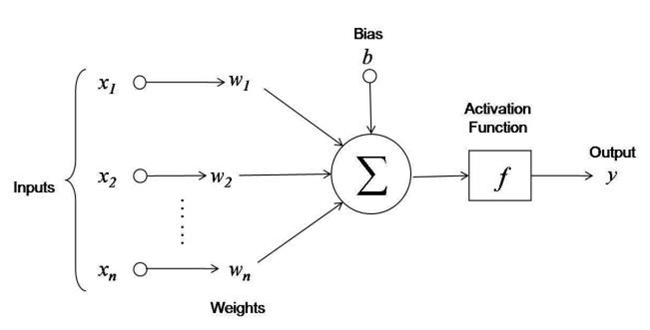


**Equation de $y$ :** 

$$
y=f\left(\sum_{i=1}^{n} x_{i} w_{i}+b\right)
$$


On en revient aux réseaux de neurones : les neurones sont connectés entre eux, la sortie $y$ d'un neurone servant d'entrée aux autres neurones du réseau. Un réseau de neurones est organisé en couches de plusieurs neurones. Les poids $w_i$ représentent la force d'une connexion entre deux neurones et sont ce que le réseau de neurones doit apprendre. Le type de réseau de neurones le plus simple est le **Feed-Forward Neural Network (FFNN)** vu plus haut : c'est un réseau dans lequel les neurones d'une couche sont connectés à tous les neurones de la couche précédente et de la couche suivante. 


Un FFNN est composé de $L$ couches dites **Feed-forward** $l∈[1,...,L]$. La couche $l=1$ est la couche d'entrée qui prend en compte les données d'entrée du réseau $x$. La couche de sortie $l=L$ donne les sorties finales $y$ du réseau. Les couches $l∈[2,L-1]$ sont appelées **couches cachées (hidden layers)** . Un FFNN vise à fournir un modèle $y=f^* (x,w)$ qui fait correspondre une entrée $x$ à une sortie $y$, avec $w$ les paramètres à optimiser, et $f^*$ une fonction d'approximation. Cette fonction $f^*$ peut être considérée comme une composition de fonctions, chaque fonction étant associée à une couche du réseau. Chaque neurone $k$ de la couche $l$ effectue l'équation de $y$ vue plus haut en prenant comme entrées les sorties $y_i$ des neurones de la couche $l-1$, et en leur appliquant à chacun un poids $w_i$. On ajoute à cela un biais $b_k$ associé au neurone $k$, et la somme pondérée des $x_i$ + $b_k$ passe par une fonction d'activation non linéaire $f^{(l)}$ associée à la couche $l$.

Le réseau est entrainé avec des données d'entraînement ${(x_1,t_1 ),...,(x_N,t_N )}$, avec $t_i$ (**target**) la vraie valeur de sortie associée à l'entrée $x_i$ (**source**) pour $i∈⟦1,N⟧$. Nous calculons ensuite la distance entre les valeurs estimées $(y_1,... y_N)$ et les vraies valeurs $(t_1,... t_N)$ à travers une fonction de coût $E(w)$.

L'objectif de l'entrainement est de trouver un ensemble de paramètres $w_{opt}$ qui minimisent la fonction de coût, donc nous mettons à jour les poids du modèle pour chaque couche durant l'entrainement en utilisant (en général) des algorithmes de **descente de gradient**.


# 2. D'accord mais donc c'est quoi un Speech-Transformer ?

Pour répondre à cette question, je vais d'abord vous présenter le Transformer.

# Le Transformer

Qu'on soit bien d'accord : non, ce n'est pas un robot-extraterrestre tiré du film x) ! Dans le cas qui nous concerne, c'est plutôt ça :



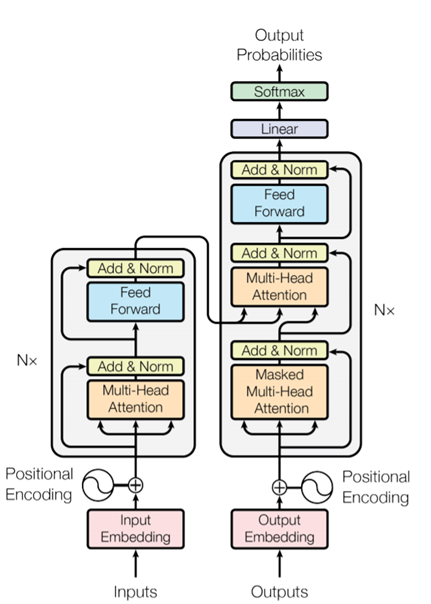

**Source**: *A. Vaswani, N. Shazeer, N. Parmar, J. Uszkoreit, L. Jones, A. N. Gomez, L. Kaiser, I. Polosukhin. Attention Is All You Need. Proceedings of the 31st International Conference on Neural Information Processing Systems, pp. 6000-6010. December 2017.*  

Le Transformer est une architecture de réseau de neurones dite **"encodeur/décodeur"** 
proposée par Vaswani et al. dans l'article [Attention is all you need (2017)](https://arxiv.org/abs/1706.03762). Il est basé sur un mécanisme appelé **self-attention** (détaillé plus loin), et a permis d'améliorer de manière drastique les performances de prédiction dans de nombreux domaines de recherche en IA, en particulier la traduction automatique (Machine Translation) et le traitement du langage naturel (Natural Language Processing).

Le Transformer est composé d'une partie d'**encodage** d’une séquence d’entrée (source), et d'une partie de **décodage**. La partie encodage va représenter la séquence d’entrée source en ayant extrait des caractéristiques essentielles sur chaque entrée de la séquence, et cette représentation est ensuite utilisée, avec la séquence désirée qu'on voudrait prédire (target) dans la partie décodage pour produire la sortie du réseau. Typiquement, dans le cas d'une tâche de traduction, on va encoder une séquence d'entrée dans une langue A, et la décoder pour produire la phrase de sortie traduite dans la langue B.

L'encodage consiste en une succession de $N$ encodeurs, et le décodage est une succession de $N$ décodeurs, avec $N=6$ utilisé dans le papier de recherche. 


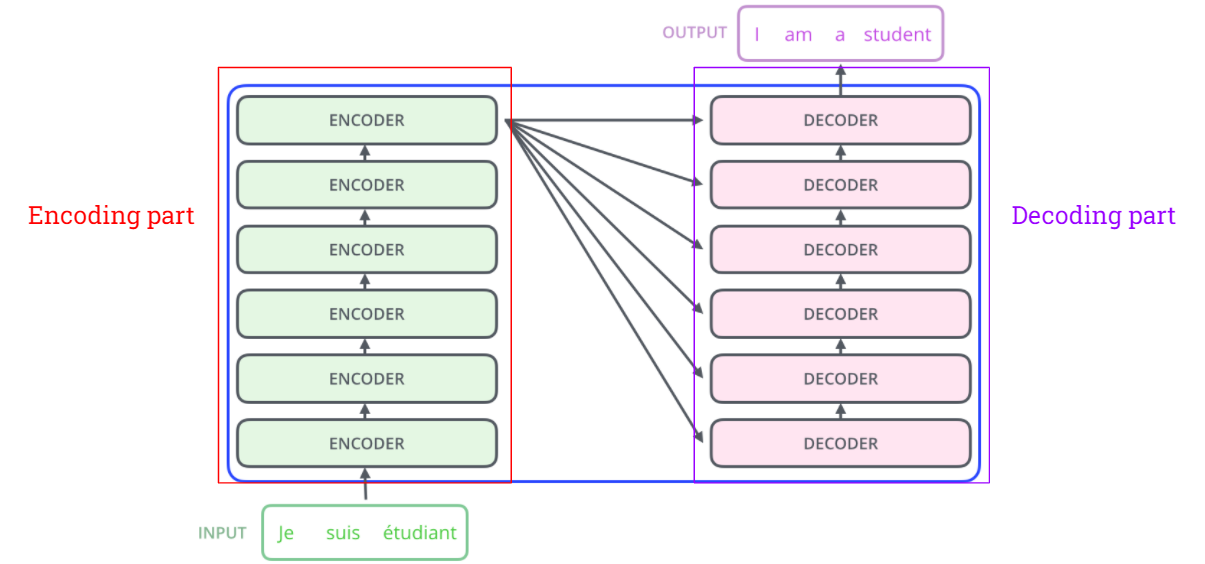


La particularité des Transformers est que dans chaque encodeur et décodeur, on a une couche dite de **self-attention** qui va “mesurer” à quel point deux éléments de la même entrée sont liés. Par exemple, toujours dans le cas de la traduction, dans une phrase d'entrée, on va obtenir des informations sur l’importance de chaque mot relativement aux autres mots de la phrase d'entrée : ça traduit les mots sur lesquels le réseau doit se concentrer lorsqu’il traite un mot de la phrase. Pour généraliser, la couche de self-attention détermine l’interdépendance (par des scores) des différentes entrées d’une même séquence afin de lui associer une représentation (encoding) pertinente.

De manière visuelle, en Natural Language Processing, on peut représenter ces interdépendances entre deux mots d'une même phrase par un tableau contenant les **scores d'attention** : dans l'image ci-dessous, le mot "doing" par exemple est très lié au mot "doing" (ce qui parait normal), et dans une moindre mesure au mot "ok".

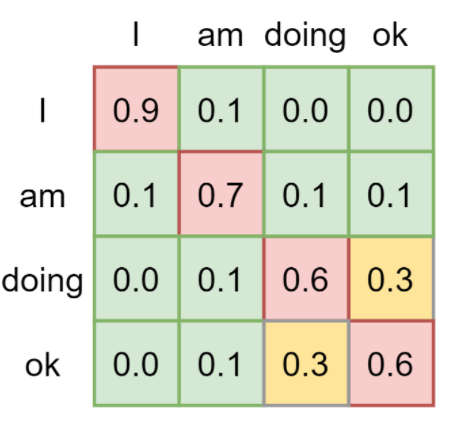

**Source** : https://www.machinecurve.com/index.php/2020/12/28/introduction-to-transformers-in-machine-learning/#generating-a-token-prediction


Ce calcul de self-attention est fait en parallèle par plusieurs blocs d’attention différents. C'est ce qu'on appelle **Multi-head Attention**, et cela a pour but d’avoir plusieurs « sous-espaces de représentation » de l'entrée d'un encodeur qui empêchent que la représentation soit totalement biaisée si une **tête d'attention (attention head)** l’est. Le vecteur de self-attention en multi-head attention n’est rien d’autre que la concaténation des vecteurs de sortie de chaque tête.


Finalement, pour reprendre l'architecture globale du Transformer, la pile d'encodeurs du Transformer prend des données d'entrée (**sources**) représentées sous forme de vecteur (**Input Embedding**), avec un encodage positionnel (**Positionnal Encoding**) qui donne une information sur la position des éléments de la séquence afin que l'ordre des éléments soit pris en compte. Les **Output Embeddings** sont (dans le cas de l'entrainement du réseau) les **targets** (les sorties idéales que l'on voudrait) pour chaque séquence source, avec un encodage positionnel, et sont envoyés à la pile de décodeurs. Chaque décodeur accepte également la sortie finale de la pile d'encodeurs.

Un encodeur contient une couche Multi-head attention suivi d'une couche Feed-forward. Une couche de décodeur contient une couche de **Masked Multi-head attention** (fonctionne comme une couche de Multi-head attention mais avec des futurs masqués), suivie d'une couche de Multi-head attention qui prend la sortie du Masked Multi-head attention et la séquence de sortie de l'encodeur, et d'une couche Feed-Forwad.  
La sortie finale de la pile de décodeurs donne, dans le cadre du Natural Language Processing par exemple, les probabilités de sortie pour chaque mot d'un vocabulaire, et on donnera comme prédiction finale le mot qui a eu la plus forte probabilité.


# Speech-Transformer

Le Speech-Transformer est, en réalité, presque pareil que le Transformer ! Ce n'est pas le Transformer qui a les performances les plus impressionnantes en Speech Recognition, mais il a au moins permis à l'époque de montrer qu'il était possible d'utiliser un Transformer pour faire de la reconnaissance vocale.


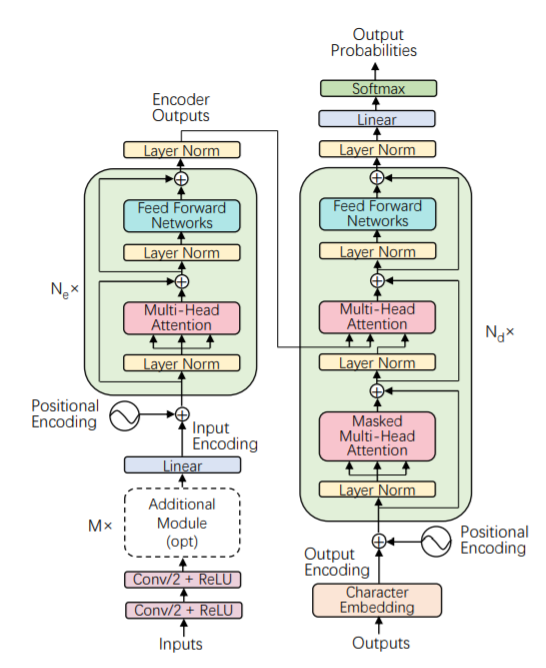

**Source** : [Speech-Transformer: A No-Recurrence Sequence-to-Sequence Model for Speech Recognition (2018)](https://ieeexplore.ieee.org/document/8462506)

Le Speech-Transformer prend en Inputs les **spectrogrammes** (graphiques temps-fréquence qui présentent les Transformées de Fourier sur un très faible nombre d'échantillons, en fonction du temps) des données audio de parole pour donner, en sortie de la partie décodage, un texte, qui correspond idéalement à la transcription de l'entrée audio.

Les changements par rapport au Transformer sont minimes : sont rajoutées au début du réseau des couches **convolutionnelles** (qui appliquent une convolution en 1 dimension aux spectrogrammes) et une couche linéaire (pareil que la couche Feed-Forward mais sans fonction d'activation, juste la somme pondérée et le biais) aux données audio. Ces couches convolutionnelles permettent d'exploiter la structure temps-fréquence des spectrogrammes, mais aussi de diviser le nombre d'échantillons temporels des spectrogrammes, nombre beaucoup plus élevé que la dimension de notre sortie texte. Cela permet donc de sous-échantillonner nos features. 


Bon, assez parlé, PLACE AU CODE :D !

# 3. Implémentation et entrainement d'un Speech-Transformer

Nous allons maintenant implémenter le Speech-Transformer dont on vient de parler, et nous allons le faire avec la bibliothèque Tensorflow. Il s'agit d'une des bibliothèques les plus utilisées pour faire du Deep Learning en Python. Nous allons importer quelques librairies pour commencer.

Note : Pour voir plus tard l'entrainement du Speech-Transformer et ne pas attendre trop longtemps pour l'entrainement, allez dans l'onget "Exécution" de ce Colab, cliquez sur "Modifier le type d'exécution", sélectionnez GPU et runnez ensuite les cellules.

In [ ]:
import sys
import os
import random
from glob import glob # utilisé pour retourner tous les noms de chemins qui correspondent à un certain motif (filename pattern matching)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Télécharcher le dataset sur lequel nous allons entrainer le Speech-Transformer

Nous allons utiliser la base de données **LJSpeech** qui est une base de données audios. Il s'agit de 13,100 courts clips audio (entre 1 et 10 secondes) d'un seul locuteur lisant des passages de 7 livres de non-fiction. Ces audios ont été enregistrés entre 2016 et 2017, et font aujourd'hui partie du domaine public. Nous allons les télécharger et les enregistrer dans le dossier 'content' dans lequel nous nous trouvons.
Attention : L'opération prend environ 5 minutes pour l'extraction des fichiers (les fichiers font au total environ 3.6 Go).

In [ ]:
# Path du Drive où j'enregistre les données, et les modèles 

os.listdir("/content/") # liste les dossiers et fichiers présents dans le dossier 'content'
os.mkdir("./donnees") # création d'un dossier 'donnees' où on va mettre les données
original_data_save ="/content/donnees/" # chemin où l'on va enregistrer les données 

In [ ]:
keras.utils.get_file( # téléchargement et extraction des données
    os.path.join(os.getcwd(), original_data_save+"data.tar.gz"),
    "https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2",
    extract=True,  # extraction du contenu du fichier tar
    archive_format="tar",
    cache_dir=original_data_save,
)


2748588032/2748572632 [==============================] - 58s 0us/step


'/content/donnees/data.tar.gz'

In [ ]:
os.listdir('/content/donnees')  

['datasets', 'data.tar.gz']

Les transcriptions textuelles des fichiers .wav sont le fichier matadata.csv. Ce fichier décrit un enregistrement par ligne, avec les données suivantes :

ID : c'est le nom du fichier .wav correspondant.

1.   ID : c'est le nom du fichier .wav correspondant
2.   Transcription : mots prononcés par le lecteur (UTF-8)
3.   Transcription normalisée : transcription avec les chiffres, les ordinaux et les unités monétaires développés en mots complets (UTF-8).

In [ ]:
saveto = original_data_save+"datasets/LJSpeech-1.1"
wavs = glob("{}/**/*.wav".format(saveto), recursive=True) # on enregistre tous les fichiers .wav (audios) dans la variable wavs (liste)

id_to_text = {} 
with open(os.path.join(saveto, "metadata.csv"), encoding="utf-8") as f:
    for line in f:
        id = line.strip().split("|")[0]
        text = line.strip().split("|")[2]
        id_to_text[id] = text



In [ ]:
print(wavs)

['/content/donnees/datasets/LJSpeech-1.1/wavs/LJ045-0245.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ043-0020.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ050-0020.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ032-0275.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ018-0239.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ011-0141.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ050-0219.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ040-0049.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ044-0227.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ006-0257.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ017-0047.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ027-0124.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ018-0136.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ025-0105.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ002-0026.wav', '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ046-0148.wav', '/conte

## Preprocess the dataset

Les données audio et textuelles telles que nous les avons ne sont pas encore utilisables pour les donner à un Speech-Transformer. Nous allons appliquer des étapes de **preprocessing** sur ces données afin de les préparer.

On écrit tout d'abord une fonction qui donne une liste de dictionnaires où dans chaque dictionnaire on a : { 'audio' : 'chemin/de/l'audio', 'text': 'transcription texte'}

In [ ]:
def get_data(wavs, id_to_text, maxlen=50):
    """ returns mapping of audio paths and transcription texts """
    data = []
    for w in wavs:
        id = w.split("/")[-1].split(".")[0]
        if len(id_to_text[id]) < maxlen:
            data.append({"audio": w, "text": id_to_text[id]})
    return data
    

Le Speech-Transformer va faire des prédictions caractère par caractère, donc nous allons créer une classe **VectorizeChar** avec laquelle on va créer une instance. L'instance va créer un vocabulaire (vocab) des caractères reconnus, et la liste des numéros associés à chaque caractère (char_to_idx). Cette instance permettra de prendre un texte en entrée et de le transformer en vecteur qui comporte le numéro de chaque caractère présent dans le texte.

In [ ]:
class VectorizeChar:
    def __init__(self, max_len=50):
        self.vocab = ( # toutes les lettres de l'alphabet + quelques signaux de ponctuation 
                       # +'<' et '>' qui spécifient respectivement le début et la fin d'une phrase
            ["-", "#", "<", ">"]
            + [chr(i + 96) for i in range(1, 27)]
            + [" ", ".", ",", "?"]
        )
        self.max_len = max_len
        self.char_to_idx = {} # liste des numéros des caractères
        for i, ch in enumerate(self.vocab):
            self.char_to_idx[ch] = i

    def __call__(self, text):
        text = text.lower()
        text = text[: self.max_len - 2]
        text = "<" + text + ">"
        pad_len = self.max_len - len(text)
        return [self.char_to_idx.get(ch, 1) for ch in text] + [0] * pad_len

    def get_vocabulary(self): # retourne le vocabulaire
        return self.vocab


max_target_len = 200  # all transcripts in out data are < 200 characters
data = get_data(wavs, id_to_text, max_target_len)
print(data[:2])
vectorizer = VectorizeChar(max_target_len) # créatin d'un vectoriseur
print("\nvocab size", len(vectorizer.get_vocabulary()))
print("\nVocab : ", vectorizer.get_vocabulary())
print("\nTexte transformé en vecteur de numéros (selon le vocab) de chaque caractère du texte: \n", vectorizer(data[0].get('text')))

[{'audio': '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ045-0245.wav', 'text': "Oswald's search for what he conceived to be the perfect society was doomed from the start."}, {'audio': '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ043-0020.wav', 'text': 'The relations between Oswald and his wife became such that Bouhe wanted to "liberate" her from Oswald.'}]

vocab size 34

Vocab :  ['-', '#', '<', '>', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '?']

Texte transformé en vecteur de numéros (selon le vocab) de chaque caractère du texte: 
 [2, 18, 22, 26, 4, 15, 7, 1, 22, 30, 22, 8, 4, 21, 6, 11, 30, 9, 18, 21, 30, 26, 11, 4, 23, 30, 11, 8, 30, 6, 18, 17, 6, 8, 12, 25, 8, 7, 30, 23, 18, 30, 5, 8, 30, 23, 11, 8, 30, 19, 8, 21, 9, 8, 6, 23, 30, 22, 18, 6, 12, 8, 23, 28, 30, 26, 4, 22, 30, 7, 18, 18, 16, 8, 7, 30, 9, 21, 18, 16, 30, 23, 11, 8, 30, 22, 23, 4, 21, 23, 31, 3, 0, 0, 0, 0, 0, 

La partie suivante crée différents datasets de classe tensorflow.data.Dataset que nous donnerons ensuite au Speech-Transformer. 
La fonction path_to_audio va servir à décoder chaque fichier audio et appliquer une **transformée de Fourier à court-terme (STFT)** sur les échantillons de l'audio (pris par tranches de 200 échantillons)afin d'en produire un spectogramme, qui sera ensuite normalisé ( (audio - sa moyenne)/sa variance), et complété avec des 0 (**padding**) pour qu'il fasse 10 secondes si jamais l'audio est plus court que 10 secondes.

Les fonction create_text_ds et create_audio_ds créent simplement des datasets de textes et d'audios, et la fonction create_tf_dataset crée un dataset complet des audios et des textes en faisant correspondre chaque audio avec sa transcription sous la forme {"source": feature audio, "target": transcription texte}.

In [ ]:
def create_text_ds(data):
    """ Crée un Dataset de textes vectorisés avec l'instance vectorizer """ 
    texts = [_["text"] for _ in data]
    text_ds = [vectorizer(t) for t in texts]
    text_ds = tf.data.Dataset.from_tensor_slices(text_ds)
    return text_ds


def path_to_audio(path):
    # spectrogram using stft
  
    audio = tf.io.read_file(path)
    # Decode WAV-encoded audio files to `float32` tensors, normalized
    # to the [-1.0, 1.0] range. Return `float32` audio and a sample rate.
    audio, _ = tf.audio.decode_wav(audio, 1)
    # Since all the data is single channel (mono), drop the `channels`
    # axis from the array.
    audio = tf.squeeze(audio, axis=-1)
    stfts = tf.signal.stft(audio, frame_length=200, frame_step=80, fft_length=256) # get spectrogram
    x = tf.math.pow(tf.abs(stfts), 0.5)
    
    # normalisation
    means = tf.math.reduce_mean(x, 1, keepdims=True)
    stddevs = tf.math.reduce_std(x, 1, keepdims=True)
    x = (x - means) / stddevs
    audio_len = tf.shape(x)[0]
    print(audio_len)
    # padding to 10 seconds
    pad_len = 2754
    paddings = tf.constant([[0, pad_len], [0, 0]])
    x = tf.pad(x, paddings, "CONSTANT")[:pad_len, :]
    return x


def create_audio_ds(data):
    flist = [_["audio"] for _ in data]
    audio_ds = tf.data.Dataset.from_tensor_slices(flist)
    audio_ds = audio_ds.map(
        path_to_audio, num_parallel_calls=tf.data.AUTOTUNE   
    )
    #num_parallel_calls :A tf.int64 scalar tf.Tensor, representing the number of batches to compute 
    #asynchronously in parallel. If not specified, batches will be computed sequentially. 
    #If the value tf.data.AUTOTUNE is used, then the number of parallel calls is set 
    #dynamically based on available resources.
    return audio_ds


def create_tf_dataset(data, bs=4):
    audio_ds = create_audio_ds(data)
    text_ds = create_text_ds(data)
    ds = tf.data.Dataset.zip((audio_ds, text_ds))
    ds = ds.map(lambda x, y: {"source": x, "target": y})
    ds = ds.batch(bs)
    ds = ds.prefetch(tf.data.AUTOTUNE) #While the model is executing training step s, the input pipeline is reading the data for step s+1.
    return ds



L'entrainement d'un réseau de neurones se fait sur des données dites d'entrainement : on va donner l'ensemble de ces données à analyser un certain nombre de fois (**nombre d'epochs**) jusqu'à ce que l'on considère que le réseau a bien appris. A chaque epoch, le réseau voit passer toutes les données d'entrainement une fois, mais n'attend pas d'avoir vu toutes les données pour calculer la fonction de coût et mettre à jour les poids, ce serait bien trop long, surtout au vu du nombre de données que nous avons. Au lieu de cela, le réseau va mettre à jour ses poids au bout du traitement d'un petit lot (**batch**) de données, par exemple 32 données (**batch_size**), durant une **itération**. Un epoch (toutes les données d'entrainement ont été traitées) est donc composé de $\frac{Nb-total-de-donnees}{batch-size}$ itérations.

Pour l'entraînement on va créer deux datasets : un **dataset d'entrainement** 'ds' avec lequel on va entraîner le réseau pour qu'il améliore ses poids, et un **dataset de validation** 'val_ds', sur lequel on évaluera à la fin de chaque epoch les performances du modèle, sans mettre à jour les poids. En effet, de par son entrainement, le réseau aura naturellement tendance à produire de meilleures prédictions sur les données sur lesquelles il s'est entrainé, plutôt que sur des données qu'il n'a jamais vu. Les données de validation nous permettent de voir si le modèle est efficace sur de nouvelles données et sinon, de pouvoir changer les paramètres externes (**hyperparamètres**) du réseau (batch_size, type d'algorithme de descente de gradient, etc.. indépendants de l'entrainement du réseau).

On prend 90% du dataset initial comme base d'entrainement et les 10% restant comme base de validation.

In [ ]:
split = int(len(data) * 0.99)
train_data = data[:split]
test_data = data[split:]
ds = create_tf_dataset(train_data, bs=64)
val_ds = create_tf_dataset(test_data, bs=4)
print(val_ds)

Tensor("strided_slice:0", shape=(), dtype=int32)
Tensor("strided_slice:0", shape=(), dtype=int32)
<PrefetchDataset shapes: {source: (None, None, 129), target: (None, 200)}, types: {source: tf.float32, target: tf.int32}>


## Transformer Input Layer

Comme tous les types de couches de réseaux de neurones n'existent pas sur Tensorflow, nous allons créer nous-mêmes les couches **SpeechFeatureEmbedding** et **TokenEmbedding**. Nous faison cela en étendant la classe **tf.keras.layers.Layer** et en écrivant la fonction *__init__* qui initialise les différentes couches, et la fonction *call* qui les appelle et fait les opérations sur les entrées.

SpeechFeatureEmbedding permet de transformer nos inputs spectrogrammes en Input Embeddings effectifs et TokenEmbedding applique une couche d'Embedding (transforme nos données en vecteurs) nos données textuelles en Output Embeddings, en ajoutant les informations de position (positionnal encoding) aux données textuelles.


In [ ]:

class TokenEmbedding(layers.Layer):
    def __init__(self, num_vocab=1000, maxlen=100, num_hid=64):
        super().__init__()
        self.emb = tf.keras.layers.Embedding(num_vocab, num_hid)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=num_hid)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        x = self.emb(x)
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        return x + positions


class SpeechFeatureEmbedding(layers.Layer):
    def __init__(self, num_hid=64, maxlen=100):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )
        self.conv2 = tf.keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )
        self.conv3 = tf.keras.layers.Conv1D(
            num_hid, 11, strides=2, padding="same", activation="relu"
        )
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=num_hid)

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return self.conv3(x)


## Couche d'encodeur du Transformer

Cette couche est construite selon la description donnée d'un encodeur (Multi-Head attention, couche Feed-Forward et les couches que nous n'avons pas détaillées) dans la figure du Speech-Transformer :

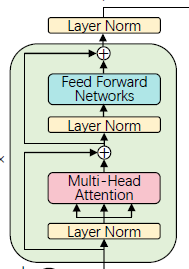

**Source** : [Speech-Transformer: A No-Recurrence Sequence-to-Sequence Model for Speech Recognition (2018)](https://ieeexplore.ieee.org/document/8462506)

In [ ]:

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, feed_forward_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [
                layers.Dense(feed_forward_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate) # layer that randomly suppress neurons of 
                                             # neural networks during training by setting them to
                                             # 0 with a pre-defined probability p
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)                      # Multi-head attention 
        attn_output = self.dropout1(attn_output, training=training) # Helps improve generalization of multi-head attention
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


## Couche de décodeur duTransformer

De même, cette couche est construite selon la description donnée d'un encodeur (Multi-Head attention, Masked Multi-Head Attention, couche Feed-Forward et les couches que nous n'avons pas détaillées) dans la figure du Speech-Transformer :

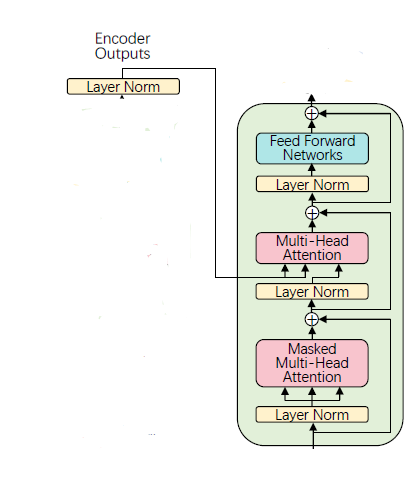

**Source** : [Speech-Transformer: A No-Recurrence Sequence-to-Sequence Model for Speech Recognition (2018)](https://ieeexplore.ieee.org/document/8462506)

In [ ]:

class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, feed_forward_dim, dropout_rate=0.1):
        super().__init__()
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = layers.LayerNormalization(epsilon=1e-6)
        self.self_att = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.enc_att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.self_dropout = layers.Dropout(0.5)
        self.enc_dropout = layers.Dropout(0.1)
        self.ffn_dropout = layers.Dropout(0.1)
        self.ffn = keras.Sequential(
            [
                layers.Dense(feed_forward_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )

    def causal_attention_mask(self, batch_size, n_dest, n_src, dtype):
        """Masks the upper half of the dot product matrix in self attention.

        This prevents flow of information from future tokens to current token.
        1's in the lower triangle, counting from the lower right corner.
        """
        i = tf.range(n_dest)[:, None]
        j = tf.range(n_src)
        m = i >= j - n_src + n_dest
        mask = tf.cast(m, dtype)
        mask = tf.reshape(mask, [1, n_dest, n_src])
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], 0
        )
        return tf.tile(mask, mult)

    def call(self, enc_out, target):
        # Utilisation des targets (Output Embedding positionnaly encoded)
        input_shape = tf.shape(target)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        causal_mask = self.causal_attention_mask(batch_size, seq_len, seq_len, tf.bool)
        target_att = self.self_att(target, target, attention_mask=causal_mask)
        target_norm = self.layernorm1(target + self.self_dropout(target_att))
        
        #Sorties du décodeurs 
        enc_out = self.enc_att(target_norm, enc_out)
        enc_out_norm = self.layernorm2(self.enc_dropout(enc_out) + target_norm)
        ffn_out = self.ffn(enc_out_norm)
        ffn_out_norm = self.layernorm3(enc_out_norm + self.ffn_dropout(ffn_out))
        return ffn_out_norm


## Speech-Transformer complet

Nous construisons maintenant le Speech-Transformer en entier avec les classes que nous avons créées. Notre modèle prend des spectrogrammes audio en entrée et prédit en sortie une séquence de caractères. Pendant l'entrainement, nous donnons en entrée du décodeur la séquence de caractères cible avec les éléments à prédire après chaque caractère prédit cachés, en tant que Output Embedding. Au cours de l'inférence (prédiction du modèle sur des données qu'il n'a pas vues, dans notre cas sur les données de validation), le décodeur utilise ses propres prédictions passées pour prédire le prochain caractère.

Nous construisons l'ensemble du Speech-Transformer, ses couches, ses étapes d'entrainement d'un batch, et de test sur un batch à la fin d'un epoch. Le modèle est une extension de la classe **keras.Model**.

In [ ]:

class Transformer(keras.Model):
    def __init__(
        self,
        num_hid=64, # nombre de couches cachées
        num_head=2, # nombre de têtes d'attention
        num_feed_forward=128, # nombre de neurones d'une couche feed-forward
        source_maxlen=100,
        target_maxlen=100,
        num_layers_enc=4, # nombre d'encodeurs
        num_layers_dec=1, # nombre de décodeurs
        num_classes=10, # taille du vocabulaire
    ):
        super().__init__()
        self.loss_metric = keras.metrics.Mean(name="loss")
        self.num_layers_enc = num_layers_enc
        self.num_layers_dec = num_layers_dec
        self.target_maxlen = target_maxlen
        self.num_classes = num_classes

        self.enc_input = SpeechFeatureEmbedding(num_hid=num_hid, maxlen=source_maxlen)
        self.dec_input = TokenEmbedding(
            num_vocab=num_classes, maxlen=target_maxlen, num_hid=num_hid
        )

        #ajout de num_layers_enc encodeurs au modèle
        self.encoder = keras.Sequential(
            [self.enc_input]
            + [
                TransformerEncoder(num_hid, num_head, num_feed_forward)
                for _ in range(num_layers_enc)
            ]
        )

        #création de num_layers_dec décodeurs, chacun étant un attribut
        for i in range(num_layers_dec):
            setattr(
                self,
                f"dec_layer_{i}",
                TransformerDecoder(num_hid, num_head, num_feed_forward),
            )

        self.classifier = layers.Dense(num_classes) # Sortie finale des décodeurs

    def decode(self, enc_out, target):
        y = self.dec_input(target)
        for i in range(self.num_layers_dec):
            y = getattr(self, f"dec_layer_{i}")(enc_out, y)
        return y

    def call(self, inputs):
        source = inputs[0]
        target = inputs[1]
        x = self.encoder(source)
        y = self.decode(x, target)
        return self.classifier(y)

    @property
    def metrics(self):
        return [self.loss_metric]

    def train_step(self, batch): 
        """Processes one batch inside model.fit()."""
        source = batch["source"]
        target = batch["target"]
        dec_input = target[:, :-1]
        dec_target = target[:, 1:]
        with tf.GradientTape() as tape:
            preds = self([source, dec_input])
            one_hot = tf.one_hot(dec_target, depth=self.num_classes)
            mask = tf.math.logical_not(tf.math.equal(dec_target, 0))
            loss = self.compiled_loss(one_hot, preds, sample_weight=mask)
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        self.loss_metric.update_state(loss)
        return {"loss": self.loss_metric.result()}

    def test_step(self, batch):
        source = batch["source"]
        target = batch["target"]
        dec_input = target[:, :-1]
        dec_target = target[:, 1:]
        preds = self([source, dec_input])
        one_hot = tf.one_hot(dec_target, depth=self.num_classes)
        mask = tf.math.logical_not(tf.math.equal(dec_target, 0))
        loss = self.compiled_loss(one_hot, preds, sample_weight=mask)
        self.loss_metric.update_state(loss)
        return {"loss": self.loss_metric.result()}

    def generate(self, source, target_start_token_idx):
        """Performs inference over one batch of inputs using greedy decoding."""
        bs = tf.shape(source)[0]
        enc = self.encoder(source)
        dec_input = tf.ones((bs, 1), dtype=tf.int32) * target_start_token_idx
        dec_logits = []
        for i in range(self.target_maxlen - 1):
            dec_out = self.decode(enc, dec_input)
            logits = self.classifier(dec_out)
            logits = tf.argmax(logits, axis=-1, output_type=tf.int32)
            last_logit = tf.expand_dims(logits[:, -1], axis=-1)
            dec_logits.append(last_logit)
            dec_input = tf.concat([dec_input, last_logit], axis=-1)
        return dec_input


## Callbacks pour afficher les predictions

Les rappels (**callbacks**) sont un type d'objet important dans TensorFlow. Ils sont conçus pour être en mesure de surveiller les performances du modèle dans les métriques à certains points de l'exécution de la formation et d'effectuer certaines actions qui peuvent dépendre de ces performances dans les valeurs de métrique. Ils vont notamment nous servir ici à afficher un batch de prédictions à la fin d'un epoch durant l'entrainement (on_epoch_end) et à la fin d'une évaluation sur un batch de validation (on_test_end). Ces fonctions sont écrits dans une classe personnalisée **DisplayOutputs**, classe étendue de **keras.callbacks.Callback**.

In [ ]:

class DisplayOutputs(keras.callbacks.Callback):
    def __init__(
        self, batch, idx_to_token, target_start_token_idx=27, target_end_token_idx=28
    ):
        """Displays a batch of outputs after every epoch

        Args:
            batch: A test batch containing the keys "source" and "target"
            idx_to_token: A List containing the vocabulary tokens corresponding to their indices
            target_start_token_idx: A start token index in the target vocabulary
            target_end_token_idx: An end token index in the target vocabulary
        """
        self.batch = batch
        self.target_start_token_idx = target_start_token_idx
        self.target_end_token_idx = target_end_token_idx
        self.idx_to_char = idx_to_token

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 != 0:
            return
        source = self.batch["source"]
        target = self.batch["target"].numpy()
        bs = tf.shape(source)[0]
        preds = self.model.generate(source, self.target_start_token_idx)
        preds = preds.numpy()
        for i in range(bs):
            target_text = "".join([self.idx_to_char[_] for _ in target[i, :]])
            prediction = ""
            for idx in preds[i, :]:
                prediction += self.idx_to_char[idx]
                if idx == self.target_end_token_idx:
                    break
            print(f"target:     {target_text.replace('-','')}")
            print(f"prediction: {prediction}\n")

    def on_test_end(self, logs=None):
        source = self.batch["source"]
        target = self.batch["target"].numpy()
        bs = tf.shape(source)[0]
        preds = self.model.generate(source, self.target_start_token_idx)
        preds = preds.numpy()
        for i in range(bs):
            target_text = "".join([self.idx_to_char[_] for _ in target[i, :]])
            prediction = ""
            for idx in preds[i, :]:
                prediction += self.idx_to_char[idx]
                if idx == self.target_end_token_idx:
                    break
            print(f"target:     {target_text.replace('-','')}")
            print(f"prediction: {prediction}\n")


## Learning rate schedule

Il existe différents algorithmes de descente de gradient pour mettre à jour les poids d'un modèle. La version la plus simple est celle du cas d'une régression linéaire, où l'on modélise une prédiction $y$ par $y(x,\mathbf{w})= w_0+w_1x$
, avec $\mathbf{w}$ les poids du modèle à améliorer. L'algorithme de descente de gradient est celui-ci, avec $\mathbf{w} = (w_0, w_1)$ :

$\mathbf{w}=\displaystyle \mathbf{w} - \eta \nabla E(w)$

Où l'on actualise $\mathbf{w}$ en soustrayant $\eta$ fois le gradient du coût sur un  batch, $\eta$ s'appelant le **taux d'apprentissage (learning rate)**. Cependant, ce n'est pas toujours en ayant $\eta$ fixe que l'on a l'entrainement le plus performant. Au lieu de ça, on peut changer la valeur du learning rate au cours des epochs de l'entrainement, et ce c'est que l'on appaller **learning rate schedule**. Dans notre cas (c'est souvent le cas) on diminue progressivement la valeur du learning rate.

In [ ]:

class CustomSchedule(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self,
        init_lr=0.00001,
        lr_after_warmup=0.001,
        final_lr=0.00001,
        warmup_epochs=15,
        decay_epochs=85,
        steps_per_epoch=203,
    ):
        super().__init__()
        self.init_lr = init_lr
        self.lr_after_warmup = lr_after_warmup
        self.final_lr = final_lr
        self.warmup_epochs = warmup_epochs
        self.decay_epochs = decay_epochs
        self.steps_per_epoch = steps_per_epoch

    def calculate_lr(self, epoch):
        """ linear warm up - linear decay """
        warmup_lr = (
            self.init_lr
            + ((self.lr_after_warmup - self.init_lr) / (self.warmup_epochs - 1)) * epoch
        )
        decay_lr = tf.math.maximum(
            self.final_lr,
            self.lr_after_warmup
            - (epoch - self.warmup_epochs)
            * (self.lr_after_warmup - self.final_lr)
            / (self.decay_epochs),
        )
        return tf.math.minimum(warmup_lr, decay_lr)

    def __call__(self, step):
        epoch = step // self.steps_per_epoch
        return self.calculate_lr(epoch)


## Création et entrainement du modèle de bout en bout

Nous créons maintenant une instance de la classe Speech-Transformer que nous allons entrainer. Nous créons les callbacks display_cb pour afficher des prédictions, et un callback pour enregistrer et sauvegarder les poids du modèle à la fin de chaque epoch. De cette manière, nous pourrons "sauvegarder" le modèle et réutiliser l'epoch de notre choix comme modèle final pour la reconnaissance vocale. Nous définissons la fonction de côût (**loss_fn**), l'optimiseur de la descente de gradient (**optimizer**), et appliquons un model.compile pour configurer le modèle avec la loss et l'optimizer choisis.

In [ ]:
batch = next(iter(val_ds))

# The vocabulary to convert predicted indices into characters
idx_to_char = vectorizer.get_vocabulary()


############## Callbacks : Include the epoch in the file name (uses `str.format`) ##################
# Rappel : original_data_save ="/content/drive/MyDrive/ENSEA_2021-2022/Projet_speech_recognition/
checkpoint_path = original_data_save+"trainings/"+"training2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# For display : 
display_cb = DisplayOutputs(
    batch, idx_to_char, target_start_token_idx=2, target_end_token_idx=3
)  # set the arguments as per vocabulary index for '<' and '>'


# For checkpoints :
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True, #j'enregistre que les poids
    save_freq='epoch') # modèle enregistré tous les epochs

########### Transformer instance 
model = Transformer(
    num_hid=200,
    num_head=2,
    num_feed_forward=400,
    target_maxlen=max_target_len,
    num_layers_enc=4,
    num_layers_dec=1,
    num_classes=34,
)
loss_fn = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, label_smoothing=0.1,
) # labels are one-hot rep, contrarily to sparseCCE

learning_rate = CustomSchedule(
    init_lr=0.00001,
    lr_after_warmup=0.001,
    final_lr=0.00001,
    warmup_epochs=15,
    decay_epochs=85,
    steps_per_epoch=len(ds),
)
optimizer = keras.optimizers.Adam(learning_rate)
model.compile(optimizer=optimizer, loss=loss_fn)


On va entrainer le modèle sur 1 seul epoch (attention l'entrainement va prendre 5-6min)

In [ ]:
history = model.fit(ds, validation_data=val_ds, callbacks=[display_cb,cp_callback], epochs=1)

203/203 [==============================] - ETA: 0s - loss: 1.7500target:     <it was, moreover, in his opinion undoubtedly the greatest nursery of crime in london.>
prediction: <the t te t the o ths t th ahe o ae t oie t s t te th tin  tt t e n wan tde t e t ahs te t te t there  thee t t t to t there te to ttine  o ie th  antt t  s aine te e t nthin   so a t e t o t oeereie 

target:     <three cartons had been placed at the window apparently to act as a gun rest and a fourth carton was placed behind those at the window.>
prediction: <the t te t the o ths t th ahe o ae t oie t s t te th tin  tt t e n wan tde t e t ahs te t te t there  thee t t t to t there te to ttine  o ie th  antt t  s aine te e t nthin   so a t e t o t oeereie 

target:     <it too was surmounted with towers.>
prediction: <the t te t the o ths t th ahe o ae t oie t s t te th tin  tt t e n wan tde t e thahs te t te t there  thee t t t to t there te to ttines o ie th  antt t  s aine te e t nthin   so a t e t o t oeere

Après, 1 epoch, ce n'est vraiment pas beaucoup, il faudrait entrainer le modèle sur au moins 30-40 epochs... mais ne vous inquiétez pas, je l'ai fait pour vous ! J'ai entrainé le réseau sur environ 90 epochs, et les meilleures performances obtenues sur les données de validation l'ont été sur l'epoch 47. Je vous ai partagé cet epoch là, il vous suffit de copier/coller les 2 fichiers 'cp-0047.ckpt' fournis et de runner la cellule qui suit. Nous allons charger le modèle de l'epoch 47 dans le 
```

In [ ]:
checkpoint_path = original_data_save+"trainings/"+"cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Best validation loss
best = checkpoint_path.format(epoch=47)
# Load the previously saved weights
model.load_weights(best)

Nous allons tester ce modèle sur une des données de validation, juste pour voir. Nous créons un mini-batch composé d'une seule donnée audio et sa transcripton, nous en créons un dataset, et nous faisons une évaluation avec model.evaluate.

In [ ]:
# Création donnée test
data_test=[]

data_test.append({'audio': '/content/donnees/datasets/LJSpeech-1.1/wavs/LJ033-0166.wav', 'text': 'Among other tests, the paper and tape were submitted to fiber analysis and spectrographic examination.'})
data_test

# Création du dataset
test_ds = create_tf_dataset(data_test)

batch = next(iter(test_ds))
# The vocabulary to convert predicted indices into characters
idx_to_char = vectorizer.get_vocabulary()

# Callbacks : Include the epoch in the file name (uses `str.format`)
# Rappel : original_data_save ="/content/drive/MyDrive/ENSEA_2021-2022/Projet_speech_recognition/
checkpoint_path = original_data_save+"trainings/"+"training3/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# For display : 
display_cb = DisplayOutputs(
    batch, idx_to_char, target_start_token_idx=2, target_end_token_idx=3
)  # set the arguments as per vocabulary index for '<' and '>'


# For checkpoints :
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True, #j'enregistre que les poids
    save_freq='epoch') # modèle enregistré tous les epochs


# Re-evaluate the model on test_data
result = model.evaluate(test_ds,callbacks=[display_cb],verbose = 1)
print("Restored model on test data, loss: {:5.2f}%".format(100 * result))

Tensor("strided_slice:0", shape=(), dtype=int32)
1/1 [==============================] - ETA: 0s - loss: 0.3720target:     <among other tests, the paper and tape were submitted to fiber analysis and spectrographic examination.>
prediction: <among other tests and spectrographic examination.>

1/1 [==============================] - 6s 6s/step - loss: 0.3720
Restored model on test data, loss: 37.20%


On peut constater que le résultat reste très approximatif et qu'une bonne partie du contenu de la phrase a été enlevée. Mais il prédit au moins quelque chose de cohérent !

# Interface audio

In [ ]:
!pip install ffmpeg-python # collection de logiciels libres destinés au traitement de flux audio ou vidéo.

A présent nous allons faire la petie interface qui va servir à enregistrer votre voix sur quelques secondes et la passer dans le modèle pour en sortir un texte prédit. Nous allons écrire un module en HTML qui permet d'enregistrer la voix quand on run la cellule, et qui permet d'arrêter l'enregistrement en appuyant sur un bouton. Pour être honnête je ne connais pas le HTML et j'ai trouvé ce code sur internet donc je ne saurais vous l'expliquer héhé.

In [ ]:
"""
Possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg
import matplotlib.pyplot as plt

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""


La partie qui suit me parle beaucoup plus. La fonction get_audio affiche le module HTML et acquiert au format .wav le flux audio entrant dans le micro de votre ordinateur.

In [ ]:
def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

Nous devons faire attention au format de sortie pour correspondre au format de nos données d'entrainement : **les fichiers audio LJSpeech sont au format 16-bit PCM WAV, à 1 seul canal, et avec un fréquence d'échantillonnage de 22050 Hz**.
Faisons un test : enregistrez-vous avec le micro de votre ordinateur (sans écouteurs à la place du micro) en train de dire 'Hello, how are you ?'

In [ ]:
audio, sr = get_audio()
wav_write("audio.wav", sr, audio.astype(np.int16))

Nous sous-échantillonons à 22050 Hz : 

In [ ]:
import librosa    
audio, sr = librosa.load('audio.wav', sr=22050) # Downsample 48kHz to 22,5kHz
print(sr)

22050


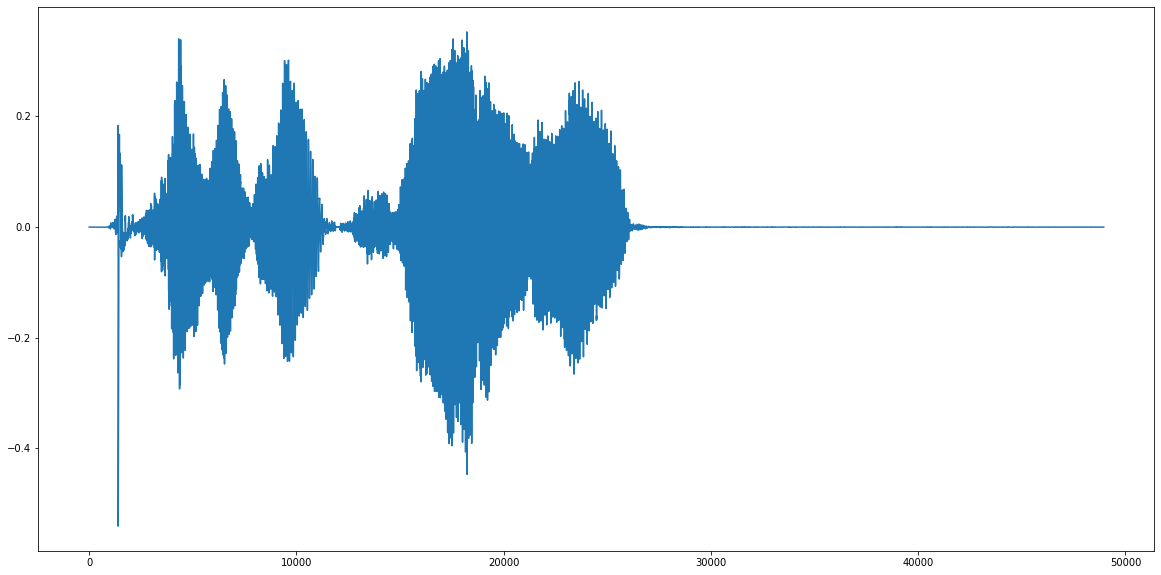

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(audio)
plt.show()

Nous passons l'audio dans le réseau en créant un mini dataset de la même manière que précédemment (j'ai triché je l'avoue, j'ai fait un mini dataset en donnant l'audio ET la phrase target car je n'arrivais pas à faire un test set sans faire planter la méthode model.predict(), qui est normalement utilisée pour faire une prédiction sur une donnée nouvelle sans target).

In [ ]:
audio_name = 'audio.wav' 
data_test=[]

#data_test.append({'audio': '/content/'+ audio_name, 'text': 'Hello, how are you ?'})
#data_test
data_test.append({'audio': '/content/audio.wav', 'text': 'Hello, how are you?'})
test_ds = create_tf_dataset(data_test)

batch = next(iter(test_ds))

# The vocabulary to convert predicted indices into characters
idx_to_char = vectorizer.get_vocabulary()

# For display : 
display_cb = DisplayOutputs(
    batch, idx_to_char
)  # set the arguments as per vocabulary index for '<' and '>'

# MOMENT DE VERITE :
result = model.evaluate(test_ds,callbacks=[display_cb],verbose = 1)

Tensor("strided_slice:0", shape=(), dtype=int32)
1/1 [==============================] - ETA: 0s - loss: 0.3516target:     <hello, how are you?>
prediction: xi wei, si.i.i. ige, s. whom o. hone high.>.>. h. hone.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>h.>h.>ho.>.>.>.>.>.>.>.>.>.>.>.>.>.>

1/1 [==============================] - 4s 4s/step - loss: 0.3516


Tadaaaaa ! Bon ce n'est pas fameux, certes, et cela peut s'expliquer par plusieurs raisons possibles :        


*   Le micro de mon ordinateur n'est vraiment pas terrible et produit un enregistrement très bruité, peut-être que cela marchera mieux chez vous ?
*   En parlant de qualité de l'audio, le dataset sur lequel a été entrainé le réseau est de très bonne qualité, les enregistrements ont été faits avec un matériel d'enregistrement professionnel avec une élocution claire. En effet, nos paroles à nous n'ont pas la même qualité car nous sommes potentiellement dans un environnement bruité, avec un moins bon matériel. Il faudrait peut-être essayer d'utiliser un autre dataset d'entrainement, par exemple une base de données de conversations
*   Dans le modèle, le nombre d'encodeurs et de décodeurs est très petit (4 et 1), ce qui n'est peut-être pas suffisant pour que le réseau produise une bonne représentation des données d'entrée et un bon décodage en sortie. A titre d'information, les auteurs du papier "Attention is all you need" ont utilisé 6 encodeurs et 6 décodeurs, et les meilleures performance dans le papiers sur Speech-Transformer ont été obtenues avec 12 encodeurs et 6 décodeurs...
*   Nous pourrions aussi entrainer le modèle avec plus de données (base LibriSpeech par exemple qui contient 1000 heures d'enregistrement contre 24h pour LJSpeech)



** J'espère que ce tutoriel vous aura satisfait et je vous dis à bientôt :) ! ** 

La prédiction que j'ai obtenue